# Objective to link speakers to newspapers to build a graph

### Imports

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import math
import json
import bz2
import time
import sys
import csv

### Helpers functions

In [9]:
# General function which print the quotes given a certain dataset and word

def get_quotes_with_word(dataset, word):
    
    quotes = []
    
    for i in range(dataset.shape[0]):
        if pd.Series(dataset.quotation[i]).str.contains(str(word)).bool() == True:
            quotes.append(dataset.quotation[i])
            
    return quotes

In [2]:
i = 0
def process_chunk(chunk):
    print(f'Processing chunk with {len(chunk)} rows')
    print(chunk.columns)
        
def add_most_occured_quotes(chunk): #function to get the most occured quotes in the db, actually the size of the top in directly depend of the chunksize! 
    # we should modify the code to initialize a df of a specific size, with column name numOccurrences full of zero to avoid that!
    quotes_more_occured = chunk[chunk.numOccurrences > min(top_10M_Occurrences_quotes_2020.numOccurrences)]
    top_10M_Occurrences_quotes_2020[len(top_10M_Occurrences_quotes_2020)-len(quotes_more_occured):len(top_10M_Occurrences_quotes_2020)] = quotes_more_occured
    return top_10M_Occurrences_quotes_2020.sort_values('numOccurrences', ascending = False)

df = []

with pd.read_json('Quotebank/quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    
    for chunk in df_reader:
        if i == 0:
            top_10M_Occurrences_quotes_2020 = chunk.sort_values('numOccurrences', ascending = True)

        if i == 100:
#             print(top10M_Occurrences_quotes[['quoteID','speaker','numOccurrences','urls','domains']])
#             df2020 = top10_Occurrences_quotes[['quoteID','speaker','numOccurrences']]
#             print("Pause started")
#             time.sleep(1) # in sec.
#             print("Pause finished")
            print(i)
            i = 0

        
            
        chunk = chunk[chunk.speaker != "None"] # dropping quote with no clear speaker 
        top_10M_Occurrences_quotes_2020 = add_most_occured_quotes(chunk)
        i = i+1 
        #process_chunk(chunk)

In [6]:
top_10M_Occurrences_quotes_2020.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
7998,2020-01-08-103116,work to become financially independent.,Duchess of Sussex,[Q3304418],2020-01-08,2037,"[[Duchess of Sussex, 0.5236], [Prince Harry, 0...",[http://kaaltv.com/news/prince-harry-meghan-st...,E
73203,2020-03-03-034586,it's just a straight arrow up of excitement,Mike Holmes,"[Q14950204, Q20676979, Q6847289, Q6847291, Q68...",2020-03-03,1952,"[[Mike Holmes, 0.6468], [None, 0.3183], [Marty...",[http://www.gamereactor.eu/doom-eternal-its-ju...,E
27459,2020-02-07-059825,make it impossible for me to do my job.,William Barr,"[Q16683338, Q43123958, Q43911234, Q8005104]",2020-02-07,1105,"[[William Barr, 0.6779], [None, 0.1921], [Pres...",[http://www.canindia.com/trump-should-stop-twe...,E
85979,2020-02-04-034120,I naturally progressed to watching FIFA and th...,Gareth Bale,[Q184586],2020-02-04,1101,"[[Gareth Bale, 0.8337], [None, 0.1663]]",[http://www.gamereactor.eu/esports/841413/Gare...,E
72467,2020-02-04-064050,"On the pitch, my goal is always to win. With E...",Gareth Bale,[Q184586],2020-02-04,1101,"[[Gareth Bale, 0.8089], [None, 0.1911]]",[http://www.gamereactor.eu/esports/841413/Gare...,E


In [4]:
top_10M_Occurrences_quotes_2020.to_csv('topOccurences/top_10M_Occurrences_quotes_2020.csv',sep=',',header=True)

## Try to get the newspaper name by removing https:// and the domain .com, .ch, etc.

In [7]:
def printProgressBar(i,max,postText):
    n_bar =10 #size of progress bar
    j= i/max
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * j):{n_bar}s}] {int(100 * j)}%  {postText}")
    sys.stdout.flush()

In [4]:
n = 1e5
top_n_Occurrences_quotes2020 = pd.read_csv('topOccurences/top_10M_Occurrences_quotes_2020.csv',sep=",",nrows=n,header=0)
top_n_Occurrences_quotes2020.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,7998,2020-01-08-103116,work to become financially independent.,Duchess of Sussex,['Q3304418'],2020-01-08 00:00:00,2037,"[['Duchess of Sussex', '0.5236'], ['Prince Har...",['http://kaaltv.com/news/prince-harry-meghan-s...,E
1,73203,2020-03-03-034586,it's just a straight arrow up of excitement,Mike Holmes,"['Q14950204', 'Q20676979', 'Q6847289', 'Q68472...",2020-03-03 00:00:00,1952,"[['Mike Holmes', '0.6468'], ['None', '0.3183']...",['http://www.gamereactor.eu/doom-eternal-its-j...,E
2,27459,2020-02-07-059825,make it impossible for me to do my job.,William Barr,"['Q16683338', 'Q43123958', 'Q43911234', 'Q8005...",2020-02-07 00:00:00,1105,"[['William Barr', '0.6779'], ['None', '0.1921'...",['http://www.canindia.com/trump-should-stop-tw...,E
3,85979,2020-02-04-034120,I naturally progressed to watching FIFA and th...,Gareth Bale,['Q184586'],2020-02-04 00:00:00,1101,"[['Gareth Bale', '0.8337'], ['None', '0.1663']]",['http://www.gamereactor.eu/esports/841413/Gar...,E
4,72467,2020-02-04-064050,"On the pitch, my goal is always to win. With E...",Gareth Bale,['Q184586'],2020-02-04 00:00:00,1101,"[['Gareth Bale', '0.8089'], ['None', '0.1911']]",['http://www.gamereactor.eu/esports/841413/Gar...,E


In [5]:
# Throw the whole URLS to this function
def shorten_url(urls):
    
    URLS_clean = [[]] * int(n)
    
    # Loop around the top 10 quotes, cited by X newspapers (corresponds to X urls)
    for i in range(len(urls)):
    
        # New URLS list with the urls of one of the 10 top quotes
        URLS_splitted = []
        URLS_splitted.append(urls[i].split('http'))
        URLS = []
        
        # Loop in each of these newspapers which cited this quote
        for j in range(1+urls[i].count('http')):
            
            newsp_name = ''
            newsp_name1 = ''
            
            # Get split points where to keep to get the website name correctly
            if ("//www." in URLS_splitted[0][j]) == True:
                splitPoint1 = URLS_splitted[0][j].find("//www.")
                newsp_name1 = ''.join(URLS_splitted[0][j][splitPoint1+6:]) # Add 6 because of the length of "//www."
                        
            elif ("//" in URLS_splitted[0][j]) == True:
                splitPoint1 = URLS_splitted[0][j].find("//")
                newsp_name1 = ''.join(URLS_splitted[0][j][splitPoint1+2:]) # Add 2 because of the length of "//"
       
            if ("." in URLS_splitted[0][j]) == True:
                splitPoint2 = newsp_name1.find(".")
                newsp_name = ''.join(newsp_name1[:splitPoint2]) # Remove the . of .com
                
            if j > 0:
                URLS.append(newsp_name)
                
        URLS_clean[i].append(URLS)
    
         
        printProgressBar(i,len(urls)-1,"done")
    
    return URLS_clean

In [11]:
short_urls = shorten_url(top_n_Occurrences_quotes2020['urls'])

[========= ] 98%  done

In [25]:
short_urls[7][1]

['blogs',
 'blogs',
 'blogs',
 'colorlines',
 'wfdd',
 'feeds',
 'salon',
 'blogs',
 'salon',
 'msnbc',
 'salon',
 'theroot',
 'msnbc',
 'msnbc',
 'ocala',
 'ocala',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'news',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'newyorker',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'salon',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'baltimoresun',
 'baltimoresun',
 'baltimoresun',
 'msnbc',
 'msnbc',
 'msnbc',
 'feeds',
 'washingtonpost',
 'washingtonpost',
 'msnbc',
 'msnbc',
 'msnbc',
 'dnainfo',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',
 'msnbc',


## Get all quotations of a given subject, to do the sentiment analysis and clusters the quotes

In [87]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\paulh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Sentiment analysis part

First, plot the most common words when the word "climate" is in the sentence.

In [7]:
# conda install -c conda-forge wordcloud

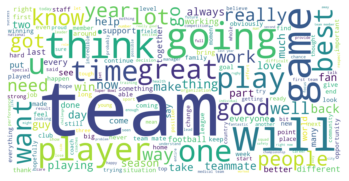

In [14]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores NOTE: WE NEED TO CREATE THE SCORE OURSELVES
# fig = px.histogram(df, x="Score")
# fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5)
# fig.update_layout(title_text='Product Score')
# fig.show()


import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
# stopwords = set(STOPWORDS)
# stopwords.update(["br", "href"])
textt = " ".join(review for review in quotes_word)
wordcloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudClimate.png')
plt.show()

### Downloading Twitter data to train our sentiment analysis model

https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [15]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

### Tokenizing the data

In [16]:
# The punkt module is a pre-trained model that helps you tokenize words and sentences. 
# For instance, this model knows that a name may contain a period (like “S. Daityari”) 
# and the presence of this period in a sentence does not necessarily end it.

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# This import 5000 positive tweets, 5000 negative tweets, 20000 tweets with no sentiment

from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

### Normalizing the data
Ex: run, ran, running...

In [18]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
from nltk.tag import pos_tag

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


NNP: Noun, proper, singular //
NN: Noun, common, singular or mass //
IN: Preposition or conjunction, subordinating //
VBG: Verb, gerund or present participle //
VBN: Verb, past participle
<br>
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


'being' became 'be', 'engaged' became 'engage', 'members' became 'member'...

### Removing noise from the data

Objective to remove the little words such as 'by', 'for', etc.

In [21]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


It worked quite well, only important words are kept. Let's run that on the tweets sample.

In [24]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

Compare the 500th positive tweet before and after removing the noise.

In [25]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


### Determining word Density

In [26]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

Get the 10 most frequent words in the positive tweets sample.

In [27]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


### Preparing data for the model

Training on Twitter's data, and testing on our data.

In [28]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

Define training dataset:

In [29]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]

Defining validation dataset:

In [30]:
valid_data = dataset[7000:]

Training the model, and validating it:

In [31]:
print(train_data[:10])

[({'wala': True, 'load': True, 'e': True, ':(': True, 'try': True, 'ko': True, "i'll": True, 'text': True, 'u': True, 'late': True}, 'Negative'), ({'need': True, 'new': True, 'phone': True, ':(': True}, 'Negative'), ({'jessica': True, 'call': True, 'quit': True, 'power': True, 'ab': True, '5:15': True, ':-(': True}, 'Negative'), ({'excite': True, 'news': True, '43': True, 'day': True, 'till': True, 'hpc': True, 'party': True, ':)': True, 'x': True}, 'Positive'), ({'shoot': True, 'tomorrow': True, 'tell': True, 'team': True, 'fly': True, 'evening': True, ':(': True, 'hate': True, 'unprepared': True}, 'Negative'), ({'hate': True, 'u': True, 'offline': True, ':(': True}, 'Negative'), ({'turn': True, 'notification': True, "i've": True, '1,300': True, 'past': True, 'day': True, ':(': True}, 'Negative'), ({'must': True, 'get': True, 'ready': True, 'trip': True, 'limpopo': True, ':)': True}, 'Positive'), ({'yeah': True, ':(': True, 'always': True, '💕': True}, 'Negative'), ({'follow': True, 'u

In [32]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, valid_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.994
Most Informative Features
                      :( = True           Negati : Positi =   2059.7 : 1.0
                      :) = True           Positi : Negati =    988.2 : 1.0
                     sad = True           Negati : Positi =     53.7 : 1.0
                follower = True           Positi : Negati =     35.8 : 1.0
                followed = True           Negati : Positi =     22.0 : 1.0
                     bam = True           Positi : Negati =     21.4 : 1.0
                 welcome = True           Positi : Negati =     19.9 : 1.0
                     x15 = True           Negati : Positi =     15.2 : 1.0
                     ugh = True           Negati : Positi =     14.5 : 1.0
                    glad = True           Positi : Negati =     14.0 : 1.0
None


Using the model to define if a random sentence (aka tweet is positive or negative):

In [33]:
from nltk.tokenize import word_tokenize

custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


Use the mode on our sentences:

In [34]:
defining_tone = []

for i in range(len(quotes_word)):

    given_topic_sentences = quotes_word[i]

    given_topic_tokens = remove_noise(word_tokenize(given_topic_sentences))

    defining_tone.append([given_topic_sentences, classifier.classify(dict([token, True] for token in given_topic_tokens))])


In [35]:
defining_tone = pd.DataFrame(defining_tone)

In [36]:
defining_tone

,0,1
0,"On the pitch, my goal is always to win. With E...",Positive
1,The app gives them everything they need to kno...,Positive
2,The President has been briefed and is monitori...,Positive
3,We're aware that the novels might not be avail...,Positive
4,We are taking a pragmatic approach to the curr...,Positive
...,...,...
1801,It's pretty special here and you get to play a...,Positive
1802,One of the greatest to ever do it has invested...,Positive
1803,The vision is to get the best out of everybody...,Positive
1804,There's no doubt he could offer something to a...,Negative


### Words sentiment's timeline

In [303]:
n = 1e5
top_1M_Occurrences_quotes2020 = pd.read_csv('topOccurences/top_10M_Occurrences_quotes_2015.csv',sep=",",nrows=n,header=0)
top_1M_Occurrences_quotes2020.head()

In [420]:
top_1M_Occurrences_quotes2020['quotation_copy'] = top_1M_Occurrences_quotes2020['quotation'].copy()

In [7]:
word_to_choose = "date" # CHOOSE A WORD HERE

In [1]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

In [50]:
quotes_word = get_quotes_with_word(top_1M_Occurrences_quotes_2020, word_to_choose)

defining_tone = []

for i in range(len(quotes_word)):

    given_topic_sentences = quotes_word[i]

    given_topic_tokens = remove_noise(word_tokenize(given_topic_sentences))

    defining_tone.append([given_topic_sentences, classifier.classify(dict([token, True] for token in given_topic_tokens))])
    
defining_tone = pd.DataFrame(defining_tone,columns=['Quote','Sentiment'])

display(defining_tone)

fig = px.histogram(defining_tone['Quote'], x=defining_tone['Sentiment'])
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment of quotes including the word "' + word_to_choose + '"', title_x=0.5)
fig.update_layout(xaxis_title=None)
fig.show()

,Quote,Sentiment
0,we will support the winner and I know that eve...,Positive
1,"I don't think I was intimidated, I think I was...",Positive
2,"However, given concerns still exist regarding ...",Positive
3,I would happily offer both these candidates a ...,Positive
4,"I was anxious to do it because, like so many o...",Positive
...,...,...
893,This is the time when voters are eager for can...,Negative
894,"On this day 20 years ago I met my best friend,...",Positive
895,The app gives them everything they need to kno...,Positive
896,If this.... had happened to a Presidential can...,Negative


In [55]:
topic_1 = ['sport','get','going','game','good','got','play','think','team','well','go']
topic_2 = ['team','like','know','people','want','say','would','thing','going','think','that']
topic_3 = ['companies','business','company','you','need','market','service','health','risk','people','community']
topic_4 = ['politic','president','state','law','Trump','united','case','action','act','attack','American']
topic_5 = ['game','he','lot','really','great','like','think','feel','hard','player','good']
topic_6 = ['elected','party','government','country','deal','people','minister','would','issue','election','must']
topic_7 = ['date','year','last','time','day','two','week','next','every','three','first']
topic_8 = ['families','family','life','woman','child','never','friend','thought','heart','one','people']
topic_9 = ['changing','make','change','making','problem','made','sure','decision','need','people','history']
topic_10 = ['countr','new','India','world','number','city','customer','test','cricket','one','area']
topic_11 = ['invest','forward','house','look','step','data','take','white','moving','new','looking']

topics = [topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11]

In [112]:
# pos_neg = np.zeros((6, 11, 11, 2)) # Sentiment / Word / Topic / Year

n = 1e5

for year in range(2015,2021,1):
    
    k = 0
    top_quotes = pd.read_csv('topOccurences/top_10M_Occurrences_quotes_{}.csv'.format(year),sep=",",nrows=n,header=0)
    
    for topic in topics:
        print(topic)
        
        for word in range(0,11,1):

            quotes_word = get_quotes_with_word(top_quotes, topic[word])

            defining_tone = []

            for i in range(len(quotes_word)):

                given_topic_sentences = quotes_word[i]

                given_topic_tokens = remove_noise(word_tokenize(given_topic_sentences))

                defining_tone.append([given_topic_sentences, classifier.classify(dict([token, True] for token in given_topic_tokens))])

            defining_tone = pd.DataFrame(defining_tone,columns=['Quote','Sentiment'])
            
            
#             fig.write_html('{}_pos_neg_{}_1e5q.html'.format(topic[word],year))

            pos_neg[year-2015,k,word,0] = defining_tone['Sentiment'].value_counts()['Positive']
            pos_neg[year-2015,k,word,1] = defining_tone['Sentiment'].value_counts()['Negative']
            
            print(pos_neg[year-2015,k,word,0],pos_neg[year-2015,k,word,1])
            
        k += 1
            
            

['sport', 'get', 'going', 'game', 'good', 'got', 'play', 'think', 'team', 'well', 'go']
458.0 116.0
4351.0 3691.0
3003.0 2972.0
1774.0 1358.0
2943.0 1167.0
1958.0 1683.0
3682.0 2250.0
3841.0 2663.0
2018.0 610.0
1706.0 752.0
10569.0 8429.0
['team', 'like', 'know', 'people', 'want', 'say', 'would', 'thing', 'going', 'think', 'that']
2018.0 610.0
3512.0 2622.0
3072.0 2134.0
3014.0 2766.0
2176.0 2983.0
1476.0 1344.0
2864.0 1778.0
5128.0 3544.0
3003.0 2972.0
3841.0 2663.0
15631.0 10497.0
['companies', 'business', 'company', 'you', 'need', 'market', 'service', 'health', 'risk', 'people', 'community']
159.0 94.0
770.0 84.0
195.0 143.0
6584.0 4991.0
1931.0 1634.0
527.0 153.0
362.0 188.0
455.0 340.0
222.0 425.0
3014.0 2766.0
692.0 55.0
['politic', 'president', 'state', 'law', 'Trump', 'united', 'case', 'action', 'act', 'attack', 'American']
487.0 556.0
524.0 164.0
777.0 626.0
581.0 504.0
135.0 128.0
70.0 14.0
445.0 382.0
636.0 385.0
4094.0 2395.0
404.0 313.0
466.0 491.0
['game', 'he', 'lot', 'r

In [116]:
# np.save('pos_neg', pos_neg)

In [58]:
pos_neg = np.load('pos_neg.npy')

Normalize + Create controversy score

In [55]:
pos_neg_norm = np.zeros((6, 11, 11, 2)) # Sentiment / Word / Topic / Year         
pos_neg_norm[:,:,:,0] = pos_neg[:,:,:,0] / (pos_neg[:,:,:,0] + pos_neg[:,:,:,1])
pos_neg_norm[:,:,:,1] = pos_neg[:,:,:,1] / (pos_neg[:,:,:,0] + pos_neg[:,:,:,1])

### Controversy score is calculated by doing: $2*\frac{min(pos_{quote},neg_{quote})}{total_{quote}}$

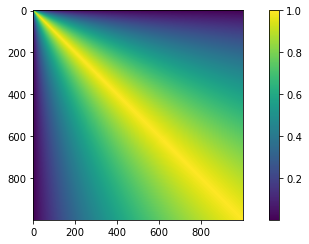

In [439]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def score(x, y):
    return np.array([(min(i,j)/(i+j))*2 for j in y for i in x]).reshape(1000, 1000)

x = y = range(1, 1001, 1)
z = score(x, y)

plt.imshow(z, interpolation='bilinear')
plt.colorbar()
plt.show()

In [57]:
contr_score = np.zeros((6, 11, 11))

for year in range(0,6,1):
    for topic in range(0,11,1):
        for word in range(0,11,1):
            contr_score[year,topic,word] = 2*(min(pos_neg_norm[year,topic,word,0],pos_neg_norm[year,topic,word,1]))/(pos_neg_norm[year,topic,word,0] + pos_neg_norm[year,topic,word,1])

### Transform to fit in Dash

In [59]:
controversy_score = contr_score.reshape(-1)

In [60]:
controversy_score.shape

(726,)

In [67]:
topics = np.array(topics).reshape(-1)

In [68]:
topics = list(topics)

In [69]:
words_df = []

for i in range(0,6,1):
    words_df.append(topics)

In [70]:
words_df = np.array(words_df).reshape(-1)

In [71]:
words_df.shape

(726,)

In [72]:
topics_df = []

for _ in range(0,6,1):
    for topic in ['Sports', 'Teamwork', 'Companies', 'Politics', 'Games', 'Elections', 'Datetime', 'Family', 'Changemakers', 'Countries', 'Investing']:
        for _ in range(0,11,1):
            topics_df.append(topic)

In [73]:
topics_df = np.array(topics_df)

In [74]:
topics_df.shape

(726,)

In [75]:
year_df = []

for year in range(2015,2021,1):
    for _ in range(0,121,1):
        year_df.append(year)

In [76]:
year_df = np.array(year_df)

In [77]:
year_df.shape

(726,)

In [78]:
# Create df

In [79]:
df = pd.DataFrame(data=[words_df,topics_df,year_df,controversy_score], index=["Word", "Topic", "Year", "Controversy_score"]).T

In [80]:
df

,Word,Topic,Year,Controversy_score
0,sport,Sports,2015,0.404181
1,get,Sports,2015,0.917931
2,going,Sports,2015,0.994812
3,game,Sports,2015,0.867178
4,good,Sports,2015,0.567883
...,...,...,...,...
721,take,Investing,2020,0.879739
722,white,Investing,2020,0.608696
723,moving,Investing,2020,0.695238
724,new,Investing,2020,0.550616


### Print all words with Dash

In [107]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

all_topics = df.Topic.unique()

app = dash.Dash(__name__)


app.layout = html.Div([
    dcc.Checklist(
        id="checklist",
        options=[{"label": x, "value": x} 
                 for x in all_topics],
        value=all_topics[3:],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="line-chart"),
])


@app.callback(
    Output("line-chart", "figure"), 
    [Input("checklist", "value")])
def update_line_chart(Topic):
    mask = df.Topic.isin(Topic)
    fig = px.line(df[mask], 
        x="Year", y="Controversy_score", color="Word")
    fig.write_html("evol_controv_score.html")
    return fig


if __name__ == "__main__":
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Dec/2021 12:07:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 12:07:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 12:07:44] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 12:07:44] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 12:07:44] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 12:07:45] "POST /_dash-update-component HTTP/1.1" 200 -


### Get mean of each topic and create another Dash

In [57]:
topics = pd.DataFrame(topics)
topic_list = topics[0]

quotes_df = []
for word in topic_1:
    quotes_df.append(get_quotes_with_word(top_n_Occurrences_quotes2020,word))

In [59]:
pos_neg_year = pos_neg[0]
pos_neg_topic = pos_neg_year[0]
pos = np.sum(pos_neg_topic[:][0])
neg = np.sum(pos_neg_topic[:][1])

In [60]:
pos_neg_topic = np.zeros([6,11]) # 11years X 11topics X [pos,neg] 
years = 0 
for year in pos_neg:
    i=0
    for topic in year:
        pos = np.sum(topic[:][0])
        neg = np.sum(topic[:][1])
        pos_neg_topic[years][i] = 2 * min(pos,neg)/(pos+neg)
        i=i+1
    years = years + 1

In [61]:
# np.save('pos_neg_topic_2020',pos_neg_topic[-1])

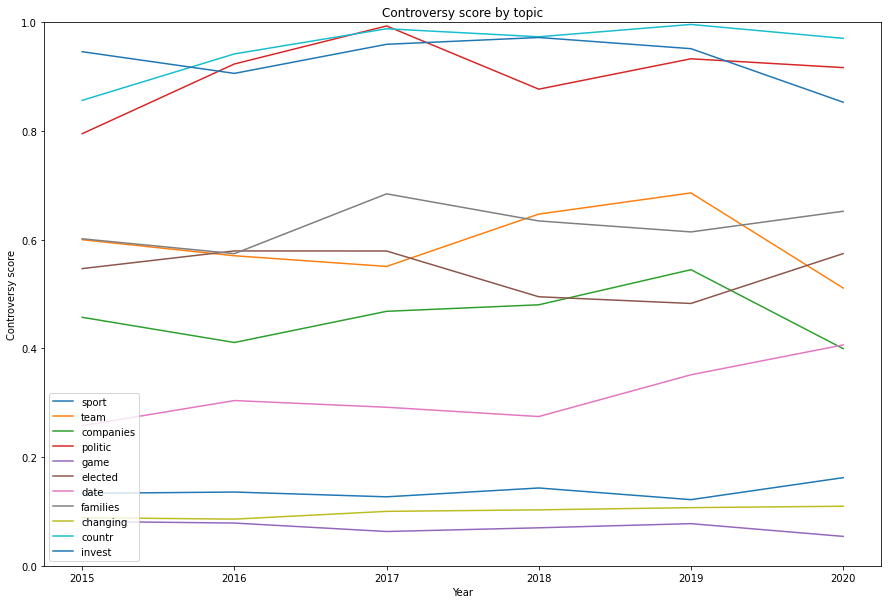

In [62]:
plt.figure(figsize=((15,10)))
plt.plot(range(2015,2021,1),pos_neg_topic)
plt.legend(topic_list,loc ='lower left')
plt.ylim([0,1])

plt.title('Controversy score by topic')
plt.xlabel('Year')
plt.ylabel('Controversy score')
plt.show()

# Validation of our controversy score #
To validate our controversy score computation, we will compare our method to existing ones from **literature**. Namely we will compare it to controversy scores based on the **variance** and the **distribution** of sentiments. 

- We will name "sentiment signature" the  distribution of sentiment scores for a given topic (in a given newspaper or across newspapers). Comparing sentiment signatures for different topics will provide a relative measure of controversy.


In [1]:
#-- additional imports
from scipy.stats import wasserstein_distance
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.neighbors import BallTree
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import  cdist
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fadel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Helper functions ####
These functions will help get the polarity scores, compute the sentiment signatures.

In [3]:
#-- Analyzer to compute sentiment scores
analyzer = SentimentIntensityAnalyzer()

#-- Get sentiment scores
def get_polarity_scores(data,all_= False, compound=True) :
    """Creates the sentiment signature of a given data
    
    data : Pandas.Series
       
    return :
        output : Pandas DataFrame
    
    """
    
    assert True in [all_,compound],"One should be True at least"
    
    output = pd.DataFrame()
    output['quotation'] =  data
    
    if all_ :
        output['pos'] =  output['quotation'].apply(lambda q : analyzer.polarity_scores(q)['pos'])
        output['neg'] = output['quotation'].apply(lambda q : analyzer.polarity_scores(q)['neg'])
        output['neu'] = output['quotation'].apply(lambda q : analyzer.polarity_scores(q)['neu'])
    
    if compound or all_ :
        output['compound'] = output['quotation'].apply(lambda q : analyzer.polarity_scores(q)['compound'])
        
    return output

#-- Get sentiment signatures or profiles
def create_signature(data,numb_bins=50):
    """Creates the sentiment signature of a given data
    
    data : pandas dataFrame 
        with columns named 'pos','neg','compound','neu'
    
    return :
        histogram : numpy array 1D
        var : scalar
        
    """
    
    histogram,bins_edges = np.histogram(data['compound'],bins=numb_bins,density=False)
    #min_ = data['compound'].min()
    #max_ = data['compound'].max()
    var = data['compound'].var()
    
    return histogram,var

#-- Compare sentiment signatures
def signatures_distance(signature_1,signature_2,func=None):
    """
    Inputs : 
        signature_1 : numpy array 1D
        signature_2 : numpy array 1D
        func : custom function
        
    Return :
        distance between signature_1 and signature_2 
        
    """
    if func is not None :
        return func(signature_1,signature_2)
    
    else:
        return wasserstein_distance(signature_1,signature_2)

#-- Get allpairwise distances
def all_pariwise_distances(XA,XB):
       
    return cdist(XA,XB,metric=signatures_distance)

#-- Get quotes from dataset
def get_quotes_wordInTopic(dataset,topic):
    """
        Inputs :
            dataset : Pandas DataFrame with column name 'quotation'
             topic : list of strings        
        
        Return :
            all_quotes : a mask for accessing the right quotes

    """
    #-- tokenise quotes
    all_tokens = dataset['quotation'].apply(lambda q : word_tokenize(q))
    
    #-- get mask
    all_quotes = all_tokens.apply(lambda q : (len(set(q).intersection(topic))>0))
    
    
    return all_quotes

def similarity(list1,list2,k):
    """
        Inputs :
        
            list1 : list of strings
            list2 : list of strings
            
        Return :
            Overlapping degree of the two input lists
    """
    return (len(set(list1).intersection(list2))-1)/(k)

#### Defining topics and loading data ####
These topics will be used to assess the correctness of our method.
we recall that a "topic" is a list of descriptive strings that allow to characterize a certain subject.

In [4]:
#--- Defining the topics
topic_1 = ['sport','get','going','game','good','got','play','think','team','well','go']
topic_2 = ['team','like','know','people','want','say','would','thing','going','think']
topic_3 = ['companies','business','company','need','market','service','health','risk','people','community']
topic_4 = ['politic','president','state','law','Trump','united','case','action','act','attack','American']
topic_5 = ['game','lot','really','great','like','think','feel','hard','player','good']
topic_6 = ['elected','party','government','country','deal','people','minister','would','issue','election','must']
topic_7 = ['date','year','last','time','day','two','week','next','every','three','first']
topic_8 = ['families','family','life','woman','child','never','friend','thought','heart','one','people']
topic_9 = ['changing','make','change','making','problem','made','sure','decision','need','people','history']
topic_10 = ['countr','new','India','world','number','city','customer','test','cricket','one','area']
topic_11 = ['invest','forward','house','look','step','data','take','white','moving','new','looking']

topics = [topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11]

In [7]:
#-- load dataframe used for model comparison
df = pd.read_csv('./topOccurences2020domains/topOccurences2020domains.csv',sep=",",header=0)
print("There are %i entires." % len(df))
df.head(3)

There are 100000 entires.


,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,7998,2020-01-08-103116,work to become financially independent.,Duchess of Sussex,['Q3304418'],2020-01-08 00:00:00,2037,"[['Duchess of Sussex', '0.5236'], ['Prince Har...",['http://kaaltv.com/news/prince-harry-meghan-s...,E
1,73203,2020-03-03-034586,it's just a straight arrow up of excitement,Mike Holmes,"['Q14950204', 'Q20676979', 'Q6847289', 'Q68472...",2020-03-03 00:00:00,1952,"[['Mike Holmes', '0.6468'], ['None', '0.3183']...",['http://www.gamereactor.eu/doom-eternal-its-j...,E
2,27459,2020-02-07-059825,make it impossible for me to do my job.,William Barr,"['Q16683338', 'Q43123958', 'Q43911234', 'Q8005...",2020-02-07 00:00:00,1105,"[['William Barr', '0.6779'], ['None', '0.1921'...",['http://www.canindia.com/trump-should-stop-tw...,E


#### Computing signatures ####
We compute the sentiment signatures of the 11 topics described above.

In [8]:
#-- [Important]  Running this can take some time !

#-- Holders
variances = []
signatures = []

#-- Iterating through topics
for topic in topics :
    mask = get_quotes_wordInTopic(df,topic)
    scores = get_polarity_scores(df[mask]['quotation'],all_= False, compound=True)
    signature,var = create_signature(scores)
    
    variances.append(var)
    signatures.append(signature)
    
#-- Stacking
signatures = np.vstack(signatures)

In [9]:
#-- Loading scores from the our method 
scores_method_1 = np.load('pos_neg_topic_2020.npy')

#### Running comparisons ####
To compare methods, we build search trees using the controversy scores and quantify the similarities in the top-k retrieved elements. The models are compared based on their abilities to model relative controversy of topics.

Mean similarity scores : [0.29040404 0.51010101 0.20454545]


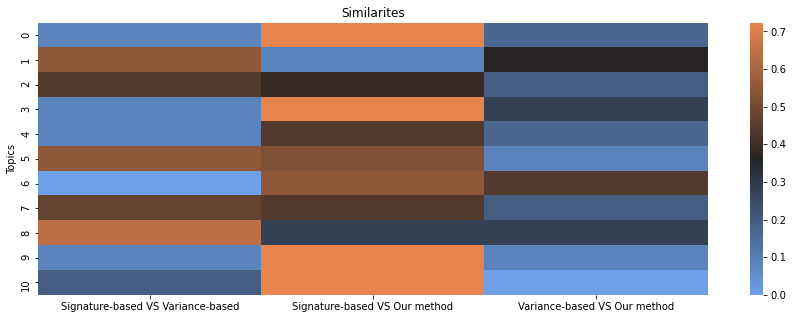

In [11]:
#-- signature distances
distance_matrix = all_pariwise_distances(signatures,signatures)

#-- build tree
X = np.array(variances).reshape(-1,1)
X_2 = scores_method_1.reshape(-1,1)

tree_signature = BallTree(distance_matrix)
tree_variance = BallTree(X)
tree_paul = BallTree(X_2)

#-- Runing
mean_similarities = np.zeros((11,3))
ks = [2,3,4]

for k in ks:
    
    similarities = np.zeros((11,3))
    
    for topic_indx in range(11):
        
        query = distance_matrix[topic_indx]
        query_2 = X[topic_indx]
        query_3 = X_2[topic_indx]

        _, ind = tree_signature.query(query.reshape(1,-1), k=k+1)
        _,ind2 = tree_variance.query(query_2.reshape(1,-1),k=k+1)
        _,ind3 = tree_paul.query(query_3.reshape(1,-1),k=k+1)

        similarities[topic_indx,0] = similarity(ind[0],ind2[0],k)
        similarities[topic_indx,1] = similarity(ind[0],ind3[0],k)
        similarities[topic_indx,2] = similarity(ind2[0],ind3[0],k)

    #-- Accumulating
    mean_similarities = mean_similarities + similarities

#-- Updating variable   
mean_similarities = mean_similarities/len(ks)

#-- Printing mean similarity scores
print('Mean similarity scores :',mean_similarities.mean(axis=0))


#-- Plotting
plt.figure(figsize=(15,5))
sns.heatmap(mean_similarities,annot=False,cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.ylabel('Topics')
plt.title('Similarites')
plt.xticks([0.5,1.5,2.5],['Signature-based VS Variance-based','Signature-based VS Our method','Variance-based VS Our method'])
plt.show()
#plt.savefig('./methods_similarites_1.png')

Text(0.5, 1.0, 'Methods comparison')

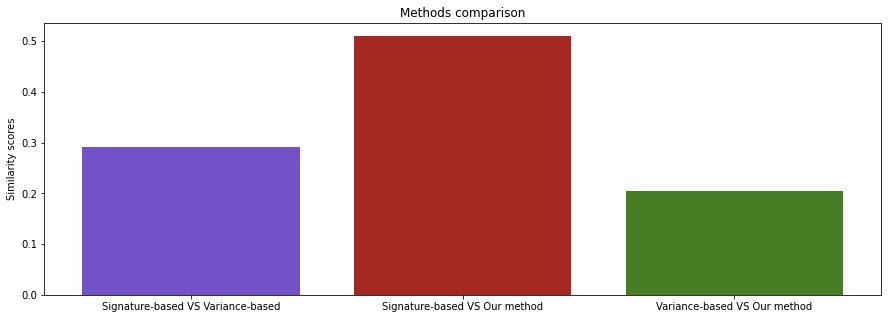

In [12]:
#-- Plotting mean similarity scores
array = mean_similarities.mean(axis=0)
plt.figure(figsize=(15,5))

plt.bar([0.5,1.5,2.5],array,color=['#7251C9','#A32921','#477D25'])
plt.xticks([0.5,1.5,2.5],['Signature-based VS Variance-based','Signature-based VS Our method','Variance-based VS Our method'])
plt.ylabel("Similarity scores")
plt.title("Methods comparison")

#### Discussion ####
To validate or discard our model, we will apply a principle of majority vote. Our expectation is that the two methods that “agreed” the most often should be more accurate and closer to the ground truth. In the figures above, we have the similarity scores of the three different methods we considered. Doing a pairwise comparison, we get that the mean similarity score (across all topics) is **highest** (i.e. 0.52) for the **sentiment signature based method and our method**. The mean similarity score between the sentiment signature based and variance based methods is 0.3 although these two methods are related to the distribution of sentiments. This analysis provides us with **arguments against the variance-based method**. This encourages us to use our method that is simpler and also provides an *absolute* measure of controversy. The sentiment signature based method requires pairwise comparisons which are costly.


# Choose the important words using BoW and TF-IDF

In [353]:
# Download en_core_web_sm for spacy

# !python -m spacy download en_core_web_sm

In [354]:
# Test use of spacy by using the spacy.load() function
import spacy
spacy.load('en_core_web_sm')

In [355]:
# Extend the stop word list if needed

newStopWords = ['u','im','dont']
stop_words.extend(newStopWords)

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Preprocess text

In [356]:
import string

In [357]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [358]:
# Define a custom function to clean punctuation from  given text
def clean_punctuation(txt):
    

    for punctuation in string.punctuation:
        txt = txt.replace(punctuation, '')  
    
    return txt

In [359]:
# Apply your function to clean the essays column

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: clean_punctuation(x)) 
    
top_1M_Occurrences_quotes2020['quotation'].head()

0    about getting people together who can then may...
1    Thats the agreement that customer everybody co...
2            its a business that were no longer in now
3    the biggest most audacious most complex crimin...
4    not interested in providing licenses for event...
Name: quotation, dtype: object

In [360]:
# Define a custom function to clean some given text
def clean_re(txt):
    
    # 'My students need' is repeated at each summary, so we remove it
    txt = re.sub(' u ', ' you ', txt)
    
    # Eliminate duplicate whitespaces using wildcards
    txt = re.sub(r'\s+', ' ',   txt)
    
    # Remove some outliers
    txt = re.sub(' dont ', ' do not ', txt)
    
    return txt

In [361]:
# Apply clean_re()

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: clean_re(x)) 
    
top_1M_Occurrences_quotes2020['quotation'].head()

0    about getting people together who can then may...
1    Thats the agreement that customer everybody co...
2            its a business that were no longer in now
3    the biggest most audacious most complex crimin...
4    not interested in providing licenses for event...
Name: quotation, dtype: object

In [362]:
from nltk.tokenize import word_tokenize

In [363]:
# Define custom function to remove stopwords

def remove_stopwords(txt, stop_words):

    token = word_tokenize(txt)
    bow = [x for x in token if not x.lower() in stop_words]
    bow_merged = ' '.join(bow)
            
    return bow_merged

In [364]:
# Apply function to remove stopwords  

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: remove_stopwords(x, stop_words)) 
    
    
top_1M_Occurrences_quotes2020['quotation'].head()

0    getting people together maybe move relationshi...
1      Thats agreement customer everybody contact says
2                                      business longer
3    biggest audacious complex criminal operation e...
4    interested providing licenses events restrict ...
Name: quotation, dtype: object

In [365]:
len(top_1M_Occurrences_quotes2020['quotation'])

1000000

In [366]:
# Define custom function to wrap simple_preprocess() from gensim

from gensim.utils import simple_preprocess

def clean_up(txt):
    
    txt = simple_preprocess(txt) # add deacc = True?
    
    return txt

In [367]:
# Apply simple_preprocess()

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: clean_up(x)) 
    
top_1M_Occurrences_quotes2020['quotation'].head()

0    [getting, people, together, maybe, move, relat...
1    [thats, agreement, customer, everybody, contac...
2                                   [business, longer]
3    [biggest, audacious, complex, criminal, operat...
4    [interested, providing, licenses, events, rest...
Name: quotation, dtype: object

In [368]:
# import these modules
from nltk.stem import PorterStemmer
  
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [369]:
# Write a stem function based on nltk.stem.WordNetLemmatizer()

def stem_fct(txt):

    ps = PorterStemmer()    
    txt = [ps.stem(w) for w in txt]
    
    return txt

In [370]:
# Apply stem_text()

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: stem_fct(x)) 

top_1M_Occurrences_quotes2020['quotation'].head()

0    [get, peopl, togeth, mayb, move, relationship,...
1    [that, agreement, custom, everybodi, contact, ...
2                                       [busi, longer]
3    [biggest, audaci, complex, crimin, oper, ever,...
4    [interest, provid, licens, event, restrict, pa...
Name: quotation, dtype: object

In [371]:
from nltk.stem.wordnet import WordNetLemmatizer

In [372]:
# Write a lemmatization function based on nltk.stem.WordNetLemmatizer()

def lemmat_fct(txt):

    lemmatizer = WordNetLemmatizer()    
    txt = [lemmatizer.lemmatize(w) for w in txt]
    
    return txt

In [373]:
# Apply lemmatize_text()

top_1M_Occurrences_quotes2020['quotation'] = top_1M_Occurrences_quotes2020['quotation'].apply(lambda x: lemmat_fct(x)) 

top_1M_Occurrences_quotes2020['quotation'].head()

0    [get, peopl, togeth, mayb, move, relationship,...
1    [that, agreement, custom, everybodi, contact, ...
2                                       [busi, longer]
3    [biggest, audaci, complex, crimin, oper, ever,...
4    [interest, provid, licens, event, restrict, pa...
Name: quotation, dtype: object

## Make LDA topic model

We define an LDA topic model for the quotes. We compute the "Coherence score." We visually inspect the topic model by inspecting the top keywords from each model.

In [401]:
# Create a dictionary from ‘top_1M_Occurrences_quotes2020['quotation']’ containing the number of times a word appears in the dataset.
import gensim

dictionary = gensim.corpora.Dictionary(top_1M_Occurrences_quotes2020['quotation'])

count = 0

for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 get
1 mayb
2 move
3 peopl
4 real
5 relationship
6 togeth
7 world
8 agreement
9 contact
10 custom


In [402]:
# Filter out tokens that appear in:
# - less than 5 documents (absolute number) or
# - more than 0.5 documents (fraction of total corpus size, not absolute number).
# - after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [403]:
# For each document we create a dictionary reporting how many words and how many times those words appear. 
# Save this to ‘bow_corpus’, then check our selected document earlier.

bow_corpus = [dictionary.doc2bow(doc) for doc in top_1M_Occurrences_quotes2020['quotation']]

# Check the 5 first values of the first bow_corpus
bow_corpus[0][:5]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

### Bag of Words

In [404]:
# Preview Bag Of Words number 0 for our sample preprocessed document.

bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], bow_doc_0[i][1]))

Word 0 ("get") appears 1 time.
Word 1 ("mayb") appears 1 time.
Word 2 ("move") appears 1 time.
Word 3 ("peopl") appears 1 time.
Word 4 ("real") appears 1 time.
Word 5 ("relationship") appears 1 time.
Word 6 ("togeth") appears 1 time.
Word 7 ("world") appears 1 time.


#### Running LDA using BoW

In [405]:
# Train our lda model using gensim.models.LdaMulticore (LdaModel in parallel) and save it to ‘lda_model’

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=13, id2word=dictionary, passes=2, workers=2)

In [406]:
# For each topic, we will explore the words occuring in that topic and its relative weight.

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"play" + 0.032*"good" + 0.031*"game" + 0.030*"he" + 0.029*"team" + 0.026*"got" + 0.020*"player" + 0.020*"realli" + 0.019*"think" + 0.018*"great"
Topic: 1 
Words: 0.042*"go" + 0.032*"get" + 0.029*"thing" + 0.028*"make" + 0.028*"think" + 0.027*"work" + 0.022*"that" + 0.021*"tri" + 0.020*"way" + 0.018*"guy"
Topic: 2 
Words: 0.020*"world" + 0.012*"woman" + 0.012*"develop" + 0.011*"busi" + 0.010*"work" + 0.009*"commun" + 0.009*"industri" + 0.009*"continu" + 0.009*"creat" + 0.009*"futur"
Topic: 3 
Words: 0.038*"love" + 0.027*"famili" + 0.023*"life" + 0.020*"never" + 0.018*"one" + 0.016*"ever" + 0.015*"thank" + 0.015*"ive" + 0.014*"alway" + 0.014*"coach"
Topic: 4 
Words: 0.079*"peopl" + 0.027*"live" + 0.018*"child" + 0.013*"mani" + 0.012*"money" + 0.008*"million" + 0.008*"want" + 0.008*"stop" + 0.008*"kill" + 0.008*"home"
Topic: 5 
Words: 0.063*"new" + 0.022*"film" + 0.019*"question" + 0.016*"stori" + 0.014*"special" + 0.013*"name" + 0.011*"excit" + 0.010*"histori" + 0.

#### Performance evaluation by classifying sample document using LDA Bag of Words model

In [407]:
# We reuse the first bow_corpus to perform the coherence score

for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nCoherence score of topics in first corpus: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Coherence score of topics in first corpus: 0.6337220668792725	 
Topic: 0.042*"go" + 0.032*"get" + 0.029*"thing" + 0.028*"make" + 0.028*"think" + 0.027*"work" + 0.022*"that" + 0.021*"tri" + 0.020*"way" + 0.018*"guy"

Coherence score of topics in first corpus: 0.1852331906557083	 
Topic: 0.079*"peopl" + 0.027*"live" + 0.018*"child" + 0.013*"mani" + 0.012*"money" + 0.008*"million" + 0.008*"want" + 0.008*"stop" + 0.008*"kill" + 0.008*"home"

Coherence score of topics in first corpus: 0.09556552767753601	 
Topic: 0.020*"world" + 0.012*"woman" + 0.012*"develop" + 0.011*"busi" + 0.010*"work" + 0.009*"commun" + 0.009*"industri" + 0.009*"continu" + 0.009*"creat" + 0.009*"futur"


If you use gensim and the following three variables, then you can visualize topics & keywords with the code below.

    lda_model:    this is an LDA model generated by gensim.models.ldamodel.LdaModel()
    id2word:      this is the dictionary term IDs from corpora.Dictionary()
    corpus:       this is the collection of "documents"

In [408]:
import pyLDAvis
import pyLDAvis.gensim_models

In [409]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

C:\Users\paulh\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.209662 -0.046938       1        1  11.364392
12     0.250769 -0.087141       2        1  11.143909
0      0.234322  0.043159       3        1  10.807803
11     0.212689  0.011120       4        1   9.001056
9     -0.164254 -0.103467       5        1   8.468824
10    -0.185502 -0.010095       6        1   8.127961
2     -0.103153  0.137579       7        1   7.487225
3      0.101897  0.128609       8        1   6.193085
6     -0.141952 -0.101952       9        1   6.038416
4      0.034157 -0.183992      10        1   5.966671
7     -0.170363 -0.111212      11        1   5.822454
8     -0.199254  0.000598      12        1   5.025269
5     -0.079018  0.323733      13        1   4.552936, topic_info=        Term          Freq         Total Category  logprob  loglift
3      peopl  80821.000000  80821.000000  Default  30.0000  30.0000
115     like  72077.000000  72077.000000  Default  29.0000  29.0000
143     year  51048.000000  51048.000000  Default  28.0000  28.0000
71      play  50801.000000  50801.000000  Default  27.0000  27.0000
159      new  29221.000000  29221.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1987  produc   2389.789175   3796.216077  Topic13  -5.2635   2.6266
107     idea   2607.769039   6791.388026  Topic13  -5.1762   2.1322
1307    read   2320.440983   3797.620954  Topic13  -5.2930   2.5968
439    first   2617.695085  25577.305617  Topic13  -5.1724   0.8100
74    experi   2384.205586  10282.127449  Topic13  -5.2658   1.6279

[815 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1712     11  0.999619     abus
2090      6  0.999626   access
1822      5  0.831548  account
1822     11  0.168248  account
544       8  0.001729    accus
...     ...       ...      ...
209       3  0.051786     your
209       4  0.000424     your
2305      5  0.999603    youth
129       3  0.999872     youv
1128     13  0.999364  zealand

[2152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 13, 1, 12, 10, 11, 3, 4, 7, 5, 8, 9, 6])

In [410]:
pyLDAvis.save_html(vis, 'BoW_13topics_OPTIMAL_2019.html')

#### Overall coherence score of LDA BoW model

In [411]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda_opt = CoherenceModel(model=lda_model, texts=top_1M_Occurrences_quotes2020['quotation'], dictionary=dictionary, coherence='c_v')
coherence_lda_opt = coherence_model_lda_opt.get_coherence()
print('\nCoherence Score of the optimal BoW model for n = 13 topics: ', coherence_lda_opt)


Coherence Score of the optimal BoW model for n = 13 topics:  0.5037048552603334


__NOTE:__ In every coherence score computed, we could increase the coherence score by looping around n to get the best coherence score in function of the hyperparameter n of the model. See below for more details.

### TF-IDF

#### Running LDA using TF-IDF

In [385]:
# Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, 
# then apply transformation to the entire corpus and call it ‘corpus_tfidf’. 
# Finally we preview TF-IDF scores for our first document.

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.22610433129595886),
 (1, 0.4222463065459928),
 (2, 0.36965926714636654),
 (3, 0.2238267153416324),
 (4, 0.39397734138934726),
 (5, 0.4410726774961017),
 (6, 0.3707292303632976),
 (7, 0.31086186816993194)]


In [386]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.013*"go" + 0.010*"get" + 0.010*"like" + 0.010*"know" + 0.009*"think" + 0.008*"thing" + 0.008*"want" + 0.007*"realli" + 0.007*"got" + 0.007*"that"
Topic: 1 Word: 0.015*"play" + 0.013*"game" + 0.011*"team" + 0.009*"good" + 0.009*"go" + 0.009*"player" + 0.009*"he" + 0.008*"win" + 0.008*"get" + 0.008*"year"
Topic: 2 Word: 0.011*"love" + 0.007*"film" + 0.006*"thank" + 0.005*"life" + 0.005*"like" + 0.005*"realli" + 0.005*"famili" + 0.005*"one" + 0.005*"excit" + 0.005*"stori"
Topic: 3 Word: 0.005*"need" + 0.004*"continu" + 0.004*"market" + 0.004*"work" + 0.004*"govern" + 0.004*"busi" + 0.004*"new" + 0.004*"develop" + 0.003*"u" + 0.003*"peopl"
Topic: 4 Word: 0.004*"pakistan" + 0.004*"investig" + 0.004*"issu" + 0.003*"polic" + 0.003*"peopl" + 0.003*"concern" + 0.003*"action" + 0.003*"case" + 0.003*"polit" + 0.003*"inform"
Topic: 5 Word: 0.004*"war" + 0.004*"million" + 0.004*"peopl" + 0.004*"fire" + 0.003*"water" + 0.003*"go" + 0.003*"dollar" + 0.003*"tax" + 0.003*"iran" + 0.003

#### Performance evaluation by classifying sample document using LDA TF-IDF model

In [387]:
# We reuse the first bow_corpus to perform the coherence score

for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nCoherence score of topics in first corpus: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Coherence score of topics in first corpus: 0.8999657034873962	 
Topic: 0.013*"go" + 0.010*"get" + 0.010*"like" + 0.010*"know" + 0.009*"think" + 0.008*"thing" + 0.008*"want" + 0.007*"realli" + 0.007*"got" + 0.007*"that"

Coherence score of topics in first corpus: 0.011117054149508476	 
Topic: 0.011*"love" + 0.007*"film" + 0.006*"thank" + 0.005*"life" + 0.005*"like" + 0.005*"realli" + 0.005*"famili" + 0.005*"one" + 0.005*"excit" + 0.005*"stori"

Coherence score of topics in first corpus: 0.011116485111415386	 
Topic: 0.015*"play" + 0.013*"game" + 0.011*"team" + 0.009*"good" + 0.009*"go" + 0.009*"player" + 0.009*"he" + 0.008*"win" + 0.008*"get" + 0.008*"year"

Coherence score of topics in first corpus: 0.011115815490484238	 
Topic: 0.005*"need" + 0.004*"continu" + 0.004*"market" + 0.004*"work" + 0.004*"govern" + 0.004*"busi" + 0.004*"new" + 0.004*"develop" + 0.003*"u" + 0.003*"peopl"

Coherence score of topics in first corpus: 0.011115344241261482	 
Topic: 0.007*"peopl" + 0.007*"woman" +

In [388]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_tfidf, bow_corpus, dictionary)
vis

C:\Users\paulh\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.160934  0.049813       1        1  19.520754
1     -0.172238  0.103952       2        1  18.373441
3      0.124058  0.086899       3        1  14.652550
9      0.116855  0.013364       4        1   9.965622
2     -0.177996  0.008230       5        1   9.004495
4      0.160764  0.004293       6        1   7.812930
6      0.065002 -0.068777       7        1   6.682483
5      0.065238 -0.000068       8        1   5.066428
8      0.042852  0.058753       9        1   4.534318
7     -0.063601 -0.256459      10        1   4.386979, topic_info=         Term          Freq         Total Category  logprob  loglift
38       game  31985.000000  31985.000000  Default  30.0000  30.0000
71       play  38737.000000  38737.000000  Default  29.0000  29.0000
187    presid  15236.000000  15236.000000  Default  28.0000  28.0000
75     player  19943.000000  19943.000000  Default  27.0000  27.0000
248      love  18202.000000  18202.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
918  congress   1061.138193   5886.820516  Topic10  -6.0382   1.4132
237    famili   1086.496011  13090.303630  Topic10  -6.0146   0.6376
136        go   1103.740860  58176.361858  Topic10  -5.9989  -0.8382
270      want   1086.412543  41364.691718  Topic10  -6.0147  -0.5130
172     would    966.704773  31220.103614  Topic10  -6.1314  -0.3484

[861 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1712      1  0.000325  abus
1712      3  0.047139  abus
1712      4  0.163524  abus
1712      6  0.199285  abus
1712      7  0.561770  abus
...     ...       ...   ...
209       6  0.002688  your
209       7  0.024380  your
209       8  0.024316  your
209       9  0.013630  your
209      10  0.009790  your

[3447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 10, 3, 5, 7, 6, 9, 8])

In [389]:
# pyLDAvis.save_html(vis, 'TFIDF_10topics_2019.html')

#### Overall coherence score of LDA TF-IDF model

In [390]:
# Compute Coherence Score
coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=top_1M_Occurrences_quotes2020['quotation'], dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score of the TF-IDF model for n=10 topics: ', coherence_lda_tfidf)


Coherence Score of the TF-IDF model for n=10 topics:  0.41740684785059584


### Hyperparameter tuning

In [391]:
# This cell takes around 3h to run for 5 to 15 topics

coherence_model_lda = []
coherence_model_lda_tfidf = []

for n in range(2,21):
    
    print('\nThe 2 models are running with n =',n)
    # Essays
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=n, id2word=dictionary, passes=2, workers=2)
    coherence_model_lda.append(CoherenceModel(model=lda_model, texts=top_1M_Occurrences_quotes2020['quotation'], dictionary=dictionary, coherence='c_v').get_coherence())
    
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=n, id2word=dictionary, passes=2, workers=4)
    coherence_model_lda_tfidf.append(CoherenceModel(model=lda_model_tfidf, texts=top_1M_Occurrences_quotes2020['quotation'], dictionary=dictionary, coherence='c_v').get_coherence())


The 2 models are running with n = 2

The 2 models are running with n = 3

The 2 models are running with n = 4

The 2 models are running with n = 5

The 2 models are running with n = 6

The 2 models are running with n = 7

The 2 models are running with n = 8

The 2 models are running with n = 9

The 2 models are running with n = 10

The 2 models are running with n = 11

The 2 models are running with n = 12

The 2 models are running with n = 13

The 2 models are running with n = 14

The 2 models are running with n = 15

The 2 models are running with n = 16

The 2 models are running with n = 17

The 2 models are running with n = 18

The 2 models are running with n = 19

The 2 models are running with n = 20


In [392]:
coherence_model_lda

[0.3180803710644451,
 0.35773464570403185,
 0.4096592052153574,
 0.4424156550883581,
 0.4487105084965814,
 0.47729179578985487,
 0.4871653562434088,
 0.4877968703699811,
 0.48480003954073114,
 0.48430246064332594,
 0.475110616507582,
 0.5147940202164498,
 0.49187981192044117,
 0.478495157299988,
 0.480530555351577,
 0.48194142646191507,
 0.4697450223543442,
 0.4857475167548917,
 0.48222249721074933]

In [393]:
coherence_model_lda_tfidf

[0.33321390302518017,
 0.39670685277359813,
 0.3629040878611375,
 0.35003602227493674,
 0.38075057425661796,
 0.3121329891307746,
 0.3961346162273427,
 0.39806376672425825,
 0.4520915813485451,
 0.4384903854378544,
 0.47842573151066214,
 0.419324431365013,
 0.42717031616425055,
 0.4157461951895945,
 0.42671302668533795,
 0.3696677193648729,
 0.4004409612065513,
 0.3955919991795537,
 0.408653805353277]

#### Plot of the models with different values of n

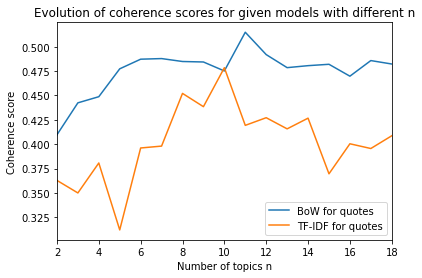

In [417]:
plt.plot(range(0,19,1),coherence_model_lda, label='BoW for quotes')
plt.plot(range(0,19,1),coherence_model_lda_tfidf, label='TF-IDF for quotes')
plt.title('Evolution of coherence scores for given models with different n')
plt.xlabel('Number of topics n')
plt.ylabel('Coherence score')
plt.xlim([2,18])
plt.xticks(range(2,19,2))
plt.legend()
plt.savefig('Evol_coh_score_2019_1e6q_withstem.png')
plt.show()

Highest coherence scores:
   - BoW for essays with n = 11: 0.4807
   - TF-IDF for essays with n = 10: 0.4249

### Most important words

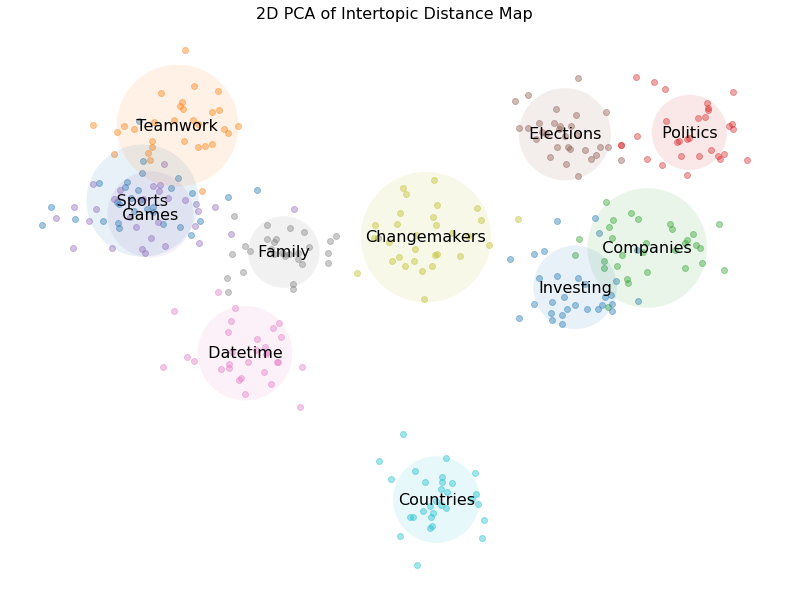

In [198]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(1000/72, 750/72), dpi=72)

topics = ['     Sports     ', '   Teamwork   ', '  Companies  ', ' Politics ', '  Games  ', ' Elections ',
          ' Datetime ', ' Family ', 'Changemakers', 'Countries', 'Investing']
centers = [[1,13], [2,16], [15,11], [16,15.5], [1.4,12], [13,15.5], [4,7], [5,11], [9,11.5], [9,1], [13,9.5]] # np.random.randint(low=10, high=20, size=(len(topics), 2))
for topic_name, center in zip(topics, centers): 
    topic = np.random.normal(loc=center, size=(30, 2))
    dots = ax.scatter(topic[:, 0], topic[:, 1], alpha=0.4)
    bbox_props = dict(boxstyle="circle, pad=0.3", fc=dots.get_facecolor().ravel(), ec="none", alpha=0.1, lw=1)
    t = ax.text(*topic.mean(axis=0), topic_name, ha="center", va="center", rotation=0,
                size=16, bbox=bbox_props)
plt.axis("off")
plt.title('2D PCA of Intertopic Distance Map', fontsize=16)
plt.savefig('2D_PCA_Intertopic.png')
plt.show()
# plt.savefig('../assets/unsupervised-models/ideal-topics.png')

## Try it yourself now!

In [37]:
word_to_choose = "team" # CHOOSE A WORD HERE

In [38]:
quotes_word = get_quotes_with_word(top_n_Occurrences_quotes2020, word_to_choose)

defining_tone = []

for i in range(len(quotes_word)):

    given_topic_sentences = quotes_word[i]

    given_topic_tokens = remove_noise(word_tokenize(given_topic_sentences))

    defining_tone.append([given_topic_sentences, classifier.classify(dict([token, True] for token in given_topic_tokens))])
    
defining_tone = pd.DataFrame(defining_tone,columns=['Quote','Sentiment'])

display(defining_tone)

fig = px.histogram(defining_tone['Quote'], x=defining_tone['Sentiment'])
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment of quotes including the word ' + word_to_choose, title_x=0.5)
fig.update_layout(xaxis_title=None)
fig.show()

,Quote,Sentiment
0,"On the pitch, my goal is always to win. With E...",Positive
1,The app gives them everything they need to kno...,Positive
2,The President has been briefed and is monitori...,Positive
3,We're aware that the novels might not be avail...,Positive
4,We are taking a pragmatic approach to the curr...,Positive
...,...,...
1801,It's pretty special here and you get to play a...,Positive
1802,One of the greatest to ever do it has invested...,Positive
1803,The vision is to get the best out of everybody...,Positive
1804,There's no doubt he could offer something to a...,Negative


In [39]:
fig.write_html('teamwork_pos_neg.html')

## Define controversy of most sold UK newspapers

In [62]:
n = 1e5
top_n_Occurrences_quotes = pd.read_csv('topOccurences/top_10M_Occurrences_quotes_2015.csv',sep=",",nrows=n,header=0)
top_n_Occurrences_quotes.head()

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,61885,2015-09-30-067637,Jimmy Fallon Went to Bayside High,Mark-Paul Gosselaar,['Q719330'],2015-09-30 18:26:59,25626,"[['Mark-Paul Gosselaar', '0.7605'], ['Jimmy Fa...",['http://on.aol.com/video/is-a-pb-j-worse-than...,E
1,67002,2015-06-25-005952,"Between the World and Me,",Ta-Nehisi Coates,['Q15452495'],2015-06-25 22:33:19,5100,"[['Ta-Nehisi Coates', '0.6557'], ['None', '0.2...",['http://blogs.wsj.com/speakeasy/2015/06/25/ra...,E
2,11491,2015-03-16-045896,"Let me be clear here, there's a real difference,",Rahm Emanuel,['Q298443'],2015-03-16 08:00:00,4744,"[['Rahm Emanuel', '0.7698'], ['None', '0.1812'...",['http://www.mcclatchydc.com/2015/03/16/259954...,E
3,36466,2015-03-12-096087,To Pimp a Butterfly.),Kendrick Lamar,['Q130798'],2015-03-12 00:13:00,4724,"[['Kendrick Lamar', '0.6869'], ['None', '0.209...",['http://feeds.latimes.com/~r/latimes/features...,E
4,48852,2015-03-16-092392,"when you're mayor, you have to pay the bills.",Rahm Emanuel,['Q298443'],2015-03-16 08:00:00,4698,"[['Rahm Emanuel', '0.8687'], ['None', '0.0735'...",['http://www.mcclatchydc.com/2015/03/16/259954...,E


In [63]:
short_urls = shorten_url(top_n_Occurrences_quotes['urls'])

[==========] 100%  done

In [64]:
short_urls = short_urls[0]

We define the 14 best newspapers sellers in the UK between 2015 and 2020, and add the quotes that they relayed in a dataframe.

In [65]:
focus_uk_np = pd.DataFrame({'newspaper': ['metro','thesun','dailymail','standard','mirror','thetimes','telegraph',
                     'dailystar','express','inews','ft','theguardian','dailyrecord','cityam']})
focus_uk_np['idx_quotes'] = [[] for _ in range(len(focus_uk_np))]
focus_uk_np['nb_quotes'] = 0

row = 0
for newspaper in focus_uk_np['newspaper']:
    
    for i in range(len(top_n_Occurrences_quotes)):   
        if newspaper in short_urls[i]:
            focus_uk_np['idx_quotes'][row].append(i)
            focus_uk_np['nb_quotes'][row] += 1
            
    row += 1

# focus_uk_np['nb_quotes'] = controverse of these quotes

<ipython-input-65-84a849ccbdc9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_uk_np['nb_quotes'][row] += 1


In [66]:
focus_uk_np

,newspaper,idx_quotes,nb_quotes
0,metro,"[1, 3, 8, 17, 22, 29, 34, 57, 59, 82, 96, 97, ...",248
1,thesun,"[17, 25, 80, 166, 443, 886, 1075, 1514, 1538, ...",103
2,dailymail,"[14, 29, 54, 96, 250, 276, 330, 506, 666, 886,...",44
3,standard,"[8, 10, 12, 13, 17, 18, 19, 22, 36, 38, 41, 54...",3049
4,mirror,"[8, 10, 13, 34, 72, 76, 92, 166, 181, 202, 209...",1409
5,thetimes,"[469, 624, 1038, 1514, 1859, 4035, 5891, 7632,...",49
6,telegraph,"[8, 10, 14, 17, 22, 28, 29, 34, 38, 47, 54, 59...",1037
7,dailystar,"[18, 51, 181, 289, 739, 754, 814, 914, 1075, 1...",320
8,express,"[8, 18, 80, 116, 209, 748, 754, 776, 789, 814,...",385
9,inews,"[202, 209, 754, 971, 1075, 7492, 9246, 18534, ...",25


In [67]:
topic_1 = ['sport','get','going','game','good','got','play','think','team','well','go']
topic_2 = ['team','like','know','people','want','say','would','thing','going','think']
topic_3 = ['companies','business','company','need','market','service','health','risk','people','community']
topic_4 = ['politic','president','state','law','Trump','united','case','action','act','attack','American']
topic_5 = ['game','lot','really','great','like','think','feel','hard','player','good']
topic_6 = ['elected','party','government','country','deal','people','minister','would','issue','election','must']
topic_7 = ['date','year','last','time','day','two','week','next','every','three','first']
topic_8 = ['families','family','life','woman','child','never','friend','thought','heart','one','people']
topic_9 = ['changing','make','change','making','problem','made','sure','decision','need','people','history']
topic_10 = ['countr','new','India','world','number','city','customer','test','cricket','one','area']
topic_11 = ['invest','forward','house','look','step','data','take','white','moving','new','looking']

topics = [topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11]

We add each word that belongs to a given topic for each newspaper.

In [68]:
topics_np = np.zeros((14, 11)) # 14 newspapers with 11 topics
np.set_printoptions(suppress=True)

for newspaper_i in range(len(focus_uk_np['newspaper'])):

    for k in (focus_uk_np['idx_quotes'][newspaper_i]):
        
        topic_i = 0
        
        for topic in topics:            

            for word in topic:
                if word in top_n_Occurrences_quotes['quotation'][k]:
                    topics_np[newspaper_i][topic_i] += 1

            topic_i += 1

In [69]:
topics_np = pd.DataFrame(topics_np, columns=['Sports', 'Teamwork', 'Companies', 'Politics', 'Games', 'Elections',
          'Datetime', 'Family', 'Changemakers', 'Countries', 'Investing'], 
                         index=['metro','thesun','dailymail','standard','mirror','thetimes','telegraph',
                     'dailystar','express','inews','ft','theguardian','dailyrecord','cityam'])

In [70]:
topics_np

,Sports,Teamwork,Companies,Politics,Games,Elections,Datetime,Family,Changemakers,Countries,Investing
metro,77.0,79.0,28.0,41.0,42.0,41.0,43.0,64.0,30.0,38.0,30.0
thesun,42.0,58.0,9.0,3.0,32.0,12.0,29.0,35.0,15.0,17.0,7.0
dailymail,10.0,14.0,1.0,0.0,6.0,5.0,5.0,6.0,4.0,5.0,4.0
standard,1686.0,1645.0,505.0,426.0,969.0,686.0,835.0,948.0,776.0,745.0,421.0
mirror,783.0,825.0,178.0,163.0,503.0,239.0,444.0,522.0,280.0,328.0,200.0
thetimes,17.0,15.0,6.0,3.0,6.0,9.0,7.0,10.0,9.0,9.0,4.0
telegraph,449.0,495.0,180.0,143.0,257.0,211.0,248.0,300.0,268.0,233.0,148.0
dailystar,178.0,164.0,19.0,27.0,107.0,34.0,111.0,87.0,53.0,67.0,37.0
express,190.0,194.0,50.0,47.0,114.0,63.0,95.0,114.0,79.0,88.0,55.0
inews,3.0,9.0,1.0,5.0,5.0,3.0,4.0,7.0,2.0,6.0,1.0


In [71]:
for i in range(14):
    topics_np.iloc[i][:] = topics_np.iloc[i][:]/np.sum(topics_np.iloc[i][:])

np.save('UK_news_topic_2015',topics_np)

In [72]:
topics_np

,Sports,Teamwork,Companies,Politics,Games,Elections,Datetime,Family,Changemakers,Countries,Investing
metro,0.150097,0.153996,0.054581,0.079922,0.081871,0.079922,0.083821,0.124756,0.058480,0.074074,0.058480
thesun,0.162162,0.223938,0.034749,0.011583,0.123552,0.046332,0.111969,0.135135,0.057915,0.065637,0.027027
dailymail,0.166667,0.233333,0.016667,0.000000,0.100000,0.083333,0.083333,0.100000,0.066667,0.083333,0.066667
standard,0.174860,0.170608,0.052375,0.044182,0.100498,0.071147,0.086600,0.098320,0.080481,0.077266,0.043663
mirror,0.175364,0.184770,0.039866,0.036506,0.112654,0.053527,0.099440,0.116909,0.062710,0.073460,0.044793
thetimes,0.178947,0.157895,0.063158,0.031579,0.063158,0.094737,0.073684,0.105263,0.094737,0.094737,0.042105
telegraph,0.153138,0.168827,0.061392,0.048772,0.087653,0.071965,0.084584,0.102319,0.091405,0.079468,0.050477
dailystar,0.201357,0.185520,0.021493,0.030543,0.121041,0.038462,0.125566,0.098416,0.059955,0.075792,0.041855
express,0.174472,0.178145,0.045914,0.043159,0.104683,0.057851,0.087236,0.104683,0.072544,0.080808,0.050505
inews,0.065217,0.195652,0.021739,0.108696,0.108696,0.065217,0.086957,0.152174,0.043478,0.130435,0.021739


Take controversy score of the focused year.

In [413]:
controv_score = pd.DataFrame(pos_neg_topic[y], columns=['Topic_controvery_score'],
                                 index=['Sports', 'Teamwork', 'Companies', 'Politics', 'Games', 'Elections',
          'Datetime', 'Family', 'Changemakers', 'Countries', 'Investing'])
controv_score

,Topic_controvery_score
Sports,0.162138
Teamwork,0.511036
Companies,0.399462
Politics,0.916490
Games,0.054100
Elections,0.574315
Datetime,0.406335
Family,0.652195
Changemakers,0.109589
Countries,0.970279


Dot product of the topic matrix per newspapers with the controversy score of the topic for a given year.

In [414]:
UK_news_controv = np.dot(topics_np,controv_score)
UK_news_controv = pd.DataFrame(UK_news_controv, columns=['News'],index=['metro','thesun','dailymail','standard','mirror','thetimes','telegraph',
                     'dailystar','express','inews','ft','theguardian','dailyrecord','cityam'])
UK_news_controv

,News
metro,0.478058
thesun,0.477126
dailymail,0.475566
standard,0.460364
mirror,0.454631
thetimes,0.444265
telegraph,0.457637
dailystar,0.445807
express,0.465869
inews,0.474180


In [415]:
np.save('UK_news_controv_2020',UK_news_controv)

In [40]:
UK_news_controv_2015 = np.load('UK_news_controv_2015.npy')
UK_news_controv_2016 = np.load('UK_news_controv_2016.npy')
UK_news_controv_2017 = np.load('UK_news_controv_2017.npy')
UK_news_controv_2018 = np.load('UK_news_controv_2018.npy')
UK_news_controv_2019 = np.load('UK_news_controv_2019.npy')
UK_news_controv_2020 = np.load('UK_news_controv_2020.npy')

Plot the controversy score of each newspaper for each year.

In [41]:
from iteration_utilities import deepflatten
UK_news_controv_2015 = list(deepflatten(UK_news_controv_2015))
UK_news_controv_2016 = list(deepflatten(UK_news_controv_2016))
UK_news_controv_2017 = list(deepflatten(UK_news_controv_2017))
UK_news_controv_2018 = list(deepflatten(UK_news_controv_2018))
UK_news_controv_2019 = list(deepflatten(UK_news_controv_2019))
UK_news_controv_2020 = list(deepflatten(UK_news_controv_2020))

In [42]:
UK_news_controv_tot = pd.DataFrame([UK_news_controv_2015,UK_news_controv_2016,UK_news_controv_2017,UK_news_controv_2018,UK_news_controv_2019,UK_news_controv_2020],
                                   columns=['metro','thesun','dailymail','standard','mirror','thetimes','telegraph','dailystar','express','inews','ft','theguardian','dailyrecord','cityam'],
                                  index=['2015','2016','2017','2018','2019','2020'])

In [43]:
UK_news_controv_tot

,metro,thesun,dailymail,standard,mirror,thetimes,telegraph,dailystar,express,inews,ft,theguardian,dailyrecord,cityam
2015,0.471798,0.413493,0.445459,0.427850,0.426682,0.441121,0.442237,0.404490,0.434418,0.516976,0.488340,0.436435,0.440782,0.431781
2016,0.450436,0.457402,0.435561,0.443306,0.440062,0.438778,0.447383,0.420293,0.474105,0.479998,0.527774,0.442366,0.458623,0.475096
2017,0.515883,0.499820,0.457835,0.472854,0.474788,0.519517,0.474506,0.453629,0.492006,0.493742,0.537955,0.476302,0.463479,0.469672
2018,0.499432,0.489352,0.425719,0.462659,0.463621,0.472554,0.453332,0.420907,0.482357,0.483284,0.592347,0.478866,0.491161,0.513155
2019,0.524837,0.506351,0.490908,0.476294,0.472441,0.487454,0.453179,0.473659,0.492802,0.498469,0.624655,0.508962,0.501799,0.526737
2020,0.478058,0.477126,0.475566,0.460364,0.454631,0.444265,0.457637,0.445807,0.465869,0.474180,0.300574,0.465816,0.466807,0.513952


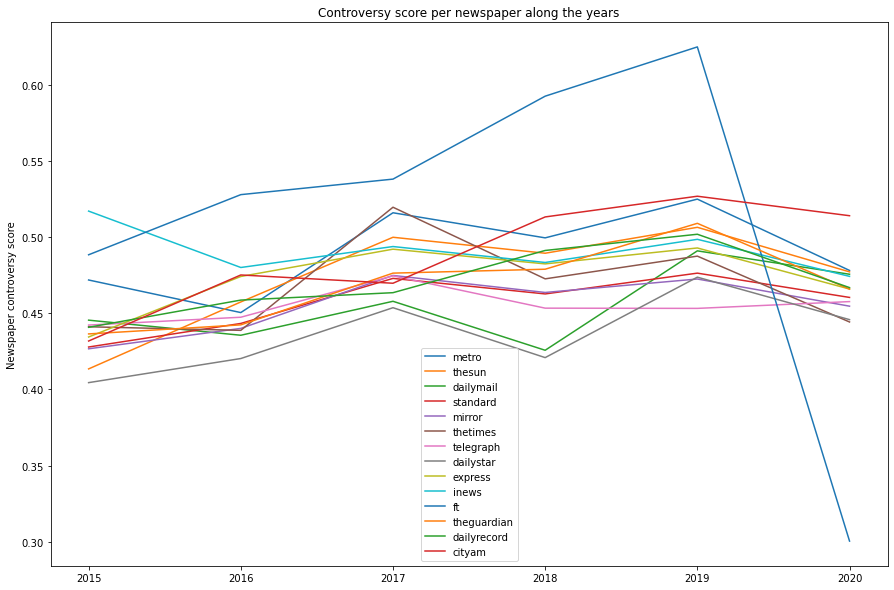

In [44]:
UK_news_controv_tot.plot(figsize=((15,10)))
plt.title('Controversy score per newspaper along the years')
plt.ylabel('Newspaper controversy score')
plt.legend()
plt.show()

Sellings are decreasing along the years, and newspapers are talking more and more on controversial topics. Do they talk about that because they know that people buy less newspaper overall and to try to get back some readers ? Oppositely, do they do a mistake by talking about controversy, which polarize the population and therefore have chance to lose readers because of that ?

Has the society become more and more polarized as everyone 'should have' an opinion on everything and no one wants to let debate awared people without trying to give their opinion?

In 2020, all newspapers seem to have talked less on controversarial subjects, it might be due to the covid-19 effect which was taking all the spotlights, and where the remaining subjects for the news to talk about were some happy news that are far from being controversial.
For the FT (Financial times), this newspaper is talking about investments as it is a finance focused newspaper. As seen previously, the word 'invest' is a highly controversial word, in fact, it makes sense that it is the most controversial newspaper from 2015 to 2019. However, the previous described effect of the covid-19 is even more important for the FT as it relies heavily on this type of news. Therefore, it seems logical to have a huge controversy drop in 2020 for the FT, and the newspaper had to diversify its subjects, and as investing is the highest one, it could only talk about a less controversial subject.

#### Try to correlate each year controversy score per newspaper with its sellings.

In [45]:
sellings = pd.read_excel('Newspapers_sellings.xlsx')

In [46]:
sellings

,Newspaper,2015,2016,2017,2018,2019,2020
0,Metro,NaN,1348033,1476956,1475372,1426050,1426535.0
1,The Sun,1978702.0,1787096,1666715,1545594,1410896,1250634.0
2,Daily Mail,1688727.0,1589471,1511357,1343142,1246568,1169241.0
3,Evening Standard,877532.0,898407,887253,888017,864620,798168.0
4,Daily Mirror,922235.0,809147,724888,583192,508705,451466.0
5,The Times,396621.0,404155,451261,440558,417298,368929.0
6,The Daily Telegraph,494675.0,472033,472258,385346,360345,NaN
7,Daily Star,425246.0,470369,443452,391998,329971,296079.0
8,Daily Express,457914.0,408700,392526,364721,321146,277237.0
9,i,280351.0,271859,266768,257223,233868,217182.0


Try KNNImputer to deal with missing values.

In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputer.fit_transform(sellings.iloc[:,1:])

array([[ 774144.7, 1348033. , 1476956. , 1475372. , 1426050. , 1426535. ],
       [1978702. , 1787096. , 1666715. , 1545594. , 1410896. , 1250634. ],
       [1688727. , 1589471. , 1511357. , 1343142. , 1246568. , 1169241. ],
       [ 877532. ,  898407. ,  887253. ,  888017. ,  864620. ,  798168. ],
       [ 922235. ,  809147. ,  724888. ,  583192. ,  508705. ,  451466. ],
       [ 396621. ,  404155. ,  451261. ,  440558. ,  417298. ,  368929. ],
       [ 494675. ,  472033. ,  472258. ,  385346. ,  360345. ,  288924.8],
       [ 425246. ,  470369. ,  443452. ,  391998. ,  329971. ,  296079. ],
       [ 457914. ,  408700. ,  392526. ,  364721. ,  321146. ,  277237. ],
       [ 280351. ,  271859. ,  266768. ,  257223. ,  233868. ,  217182. ],
       [ 219444. ,  198237. ,  188924. ,  189579. ,  180053. ,  157982. ],
       [ 185429. ,  164163. ,  156756. ,  152714. ,  141160. ,  132341. ],
       [ 203725. ,  176892. ,  155772. ,  134087. ,  119328. ,  104343. ],
       [ 446317.2,   9725

It does not give plausible results, so we will use a linear regression.

In [48]:
from scipy import interpolate

x_metro = [2016, 2017, 2018, 2019, 2020]
y_metro = sellings.iloc[0,2:]
f = interpolate.interp1d(x_metro, y_metro, fill_value = "extrapolate")
sellings.iloc[0,1] = f(2015)

x_telegraph = [2015, 2016, 2017, 2018, 2019]
y_telegraph = sellings.iloc[6,1:6]
f = interpolate.interp1d(x_telegraph, y_telegraph, fill_value = "extrapolate")
sellings.iloc[6,6] = f(2020)

x_cityam = [2016, 2017, 2018, 2019, 2020]
y_cityam = sellings.iloc[-1,2:]
f = interpolate.interp1d(x_cityam, y_cityam, fill_value = "extrapolate")
sellings.iloc[-1,1] = f(2015)

In [49]:
sellings

,Newspaper,2015,2016,2017,2018,2019,2020
0,Metro,1219110.0,1348033,1476956,1475372,1426050,1426535.0
1,The Sun,1978702.0,1787096,1666715,1545594,1410896,1250634.0
2,Daily Mail,1688727.0,1589471,1511357,1343142,1246568,1169241.0
3,Evening Standard,877532.0,898407,887253,888017,864620,798168.0
4,Daily Mirror,922235.0,809147,724888,583192,508705,451466.0
5,The Times,396621.0,404155,451261,440558,417298,368929.0
6,The Daily Telegraph,494675.0,472033,472258,385346,360345,335344.0
7,Daily Star,425246.0,470369,443452,391998,329971,296079.0
8,Daily Express,457914.0,408700,392526,364721,321146,277237.0
9,i,280351.0,271859,266768,257223,233868,217182.0


In [50]:
sellings.to_csv('UK_sellings.csv')

In [51]:
UK_news_controv_tot = UK_news_controv_tot.T
UK_news_controv_tot

,2015,2016,2017,2018,2019,2020
metro,0.471798,0.450436,0.515883,0.499432,0.524837,0.478058
thesun,0.413493,0.457402,0.499820,0.489352,0.506351,0.477126
dailymail,0.445459,0.435561,0.457835,0.425719,0.490908,0.475566
standard,0.427850,0.443306,0.472854,0.462659,0.476294,0.460364
mirror,0.426682,0.440062,0.474788,0.463621,0.472441,0.454631
thetimes,0.441121,0.438778,0.519517,0.472554,0.487454,0.444265
telegraph,0.442237,0.447383,0.474506,0.453332,0.453179,0.457637
dailystar,0.404490,0.420293,0.453629,0.420907,0.473659,0.445807
express,0.434418,0.474105,0.492006,0.482357,0.492802,0.465869
inews,0.516976,0.479998,0.493742,0.483284,0.498469,0.474180


In [52]:
UK_news_controv_tot.to_csv('UK_news_controv_tot.csv')

In [53]:
#-- Poly fit
def poly_fit(x_eval,x_fit,y_fit,degree=3):
    """
        returns y_predict
    """
    p = np.poly1d(np.polyfit(x_fit, y_fit, degree))
    return p(x_eval)

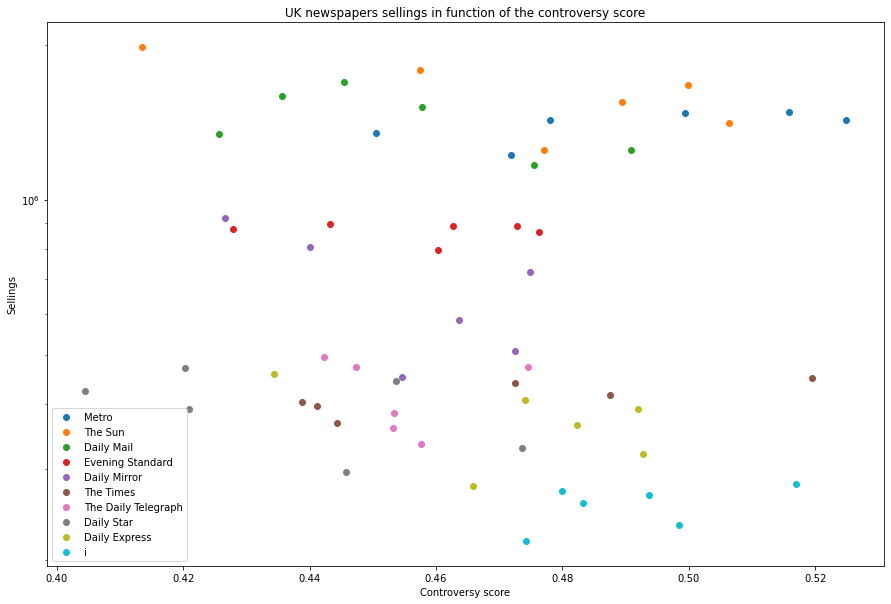

In [54]:
plt.figure(figsize=(15,10))

for i in range(11):
    if sellings.iloc[i,0] != 'Financial Times':
        x = UK_news_controv_tot.iloc[i,:]
        y = sellings.iloc[i,1:]
        plt.scatter(x, y, label=sellings.iloc[i,0])
        plt.yscale('log')
#         y_pred = poly_fit(x, x, y, degree=1)
#         plt.plot(x, y_pred)

plt.title('UK newspapers sellings in function of the controversy score')
plt.xlabel('Controversy score')
plt.ylabel('Sellings')
plt.legend()
plt.show()